In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("supermarket_sales (1).csv")
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


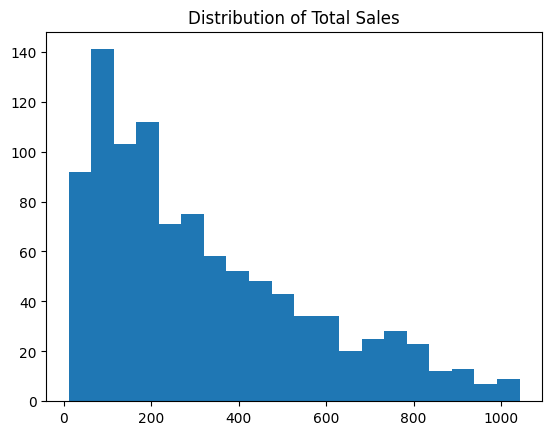

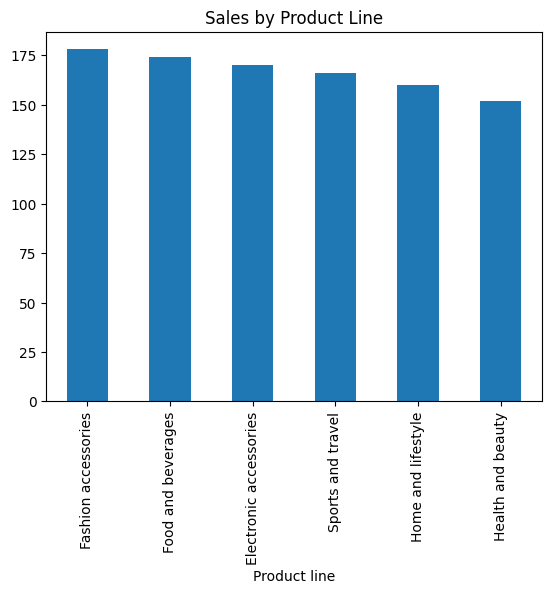

In [10]:
df.describe()
df['Product line'].value_counts()
df['Payment'].value_counts()
plt.hist(df['Total'], bins=20)
plt.title("Distribution of Total Sales")
plt.show()
df['Product line'].value_counts().plot(kind='bar')
plt.title("Sales by Product Line")
plt.show()


In [7]:
#df = pd.read_csv("/content/supermarket_sales (1).csv")
import os
print(os.getcwd())



/content


In [11]:
import os
os.listdir()
df.describe()




,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [12]:
df['Product line'].value_counts()
df['Payment'].value_counts()


,count
Payment,
Ewallet,345
Cash,344
Credit card,311


In [16]:
import sqlite3

conn = sqlite3.connect(':memory:')
df.to_sql('sales', conn, index=False)




1000

In [17]:
import pandas as pd

pd.read_sql("""
SELECT `Product line`, SUM(Total) as Revenue
FROM sales
GROUP BY `Product line`
ORDER BY Revenue DESC
LIMIT 5;
""", conn)


,Product line,Revenue
0,Food and beverages,56144.8440
1,Sports and travel,55122.8265
2,Electronic accessories,54337.5315
3,Fashion accessories,54305.8950
4,Home and lifestyle,53861.9130


In [18]:
pd.read_sql("""
SELECT Branch, SUM(Total) as Revenue
FROM sales
GROUP BY Branch
ORDER BY Revenue DESC;
""", conn)


,Branch,Revenue
0,C,110568.7065
1,A,106200.3705
2,B,106197.6720


In [19]:
pd.read_sql("""
SELECT Payment, COUNT(*) as Usage_Count
FROM sales
GROUP BY Payment
ORDER BY Usage_Count DESC;
""", conn)


,Payment,Usage_Count
0,Ewallet,345
1,Cash,344
2,Credit card,311


In [20]:
pd.read_sql("""
SELECT strftime('%m', Date) as Month,
SUM(Total) as Revenue
FROM sales
GROUP BY Month
ORDER BY Month;
""", conn)


,Month,Revenue
0,None,322966.749


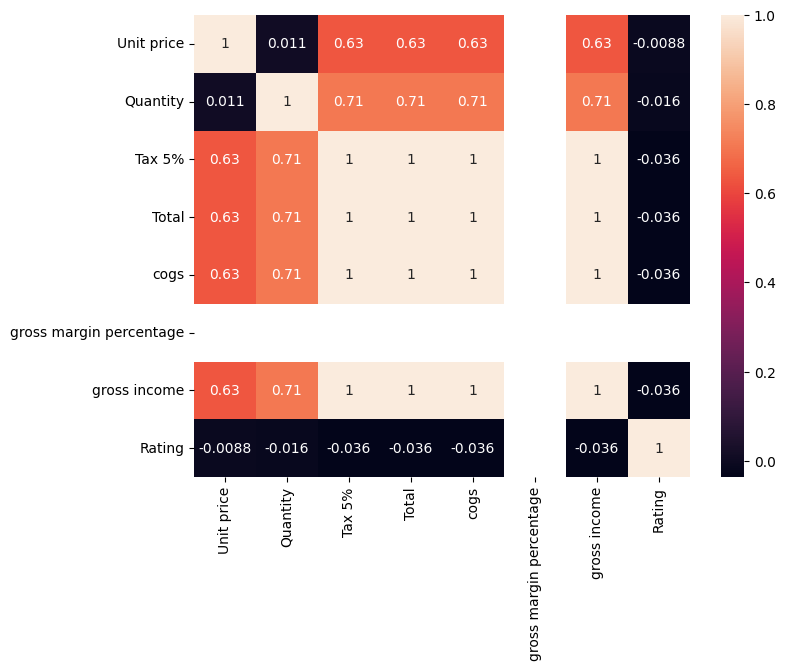

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()


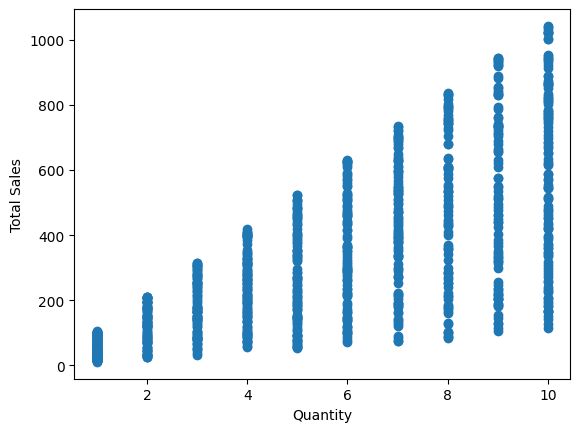

In [22]:
plt.figure()
plt.scatter(df['Quantity'], df['Total'])
plt.xlabel("Quantity")
plt.ylabel("Total Sales")
plt.show()
